In [6]:
import numpy as np # NumPy
import pandas as pd # Pandas
import matplotlib.pyplot as plt
import seaborn as sns

# IPython 매직 명령 : 그래프를 jupyter notebook에 포함
%matplotlib inline

# IPython( jupyter notebook ) 디스플레이 설정 변경
# 출력할 열의 개수 한도 설정
pd.set_option( 'display.max_columns', 20 )
# 출력할 열의 너비 설정
pd.set_option( 'display.max_colwidth', 20 )
# 유니코드 사용 너비 조정
pd.set_option( 'display.unicode.east_asian_width', True )

# 경고( warnings ) 메시지 출력 방지
import warnings
warnings.filterwarnings( 'ignore' )

# IPython( jupyter notebook ) 디스플레이 설정 변경
# 출력할 열의 개수 한도 설정
pd.set_option( 'display.max_columns', 20 )
# 출력할 열의 너비 설정
pd.set_option( 'display.max_colwidth', 20 )
# 유니코드 사용 너비 조정
pd.set_option( 'display.unicode.east_asian_width', True )

# 경고( warnings ) 메시지 출력 방지
import warnings
warnings.filterwarnings( 'ignore' )

In [8]:
# matplotlib 사용시 한글 폰트 출력 오류 문제 해결 - windows OS
from matplotlib import font_manager, rc
font_path = "c:\\Windows\\Fonts\\malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font_name)

## Matplotlib 시각화

In [13]:
df = pd.read_excel('data/시도별 전출입 인구수.xlsx', header = 0)

df = df.fillna(method = 'ffill')

# 서울에서 다른 지역으로 전출한 데이터만 추출
mask = (df['전출지별'] == '서울특별시') & \
        (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis = 1)
df_seoul.rename({'전입지별': '전입지'}, axis = 1, inplace = True)
df_seoul.set_index('전입지', inplace = True)

df_seoul.head()

sr_one = df_seoul.loc['경기도']
sr_one.head()

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
Name: 경기도, dtype: object

## 화면 분할을 통한 여러 그래프 표시

<function matplotlib.pyplot.show(close=None, block=None)>

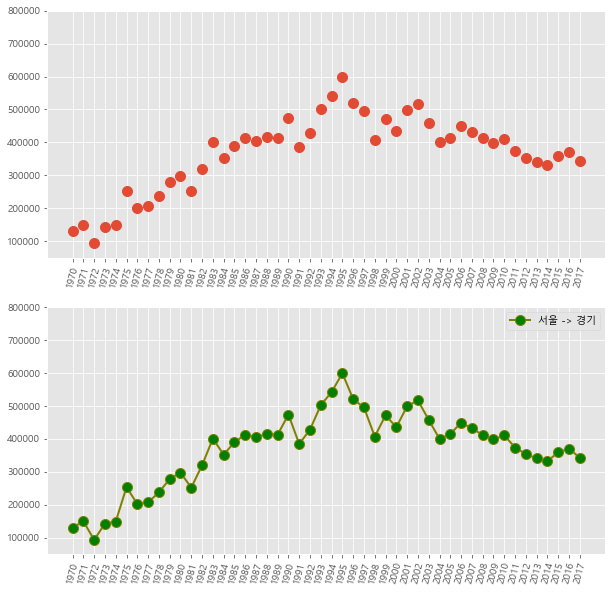

In [17]:
plt.style.use('ggplot')
# 전체 그림틀 객체를 fig 변수에 저장
fig = plt.figure( figsize = (10, 10))

# 전체 그림틀 객체에 sub plot를 추가
ax1 = fig.add_subplot(2,1,1) # 추가되는 sub plot 위치 설정
ax2 = fig.add_subplot(2,1,2)

# sub plot 각각에 그래프 표시
ax1.plot(sr_one, 'o', markersize = 10)
ax2.plot(sr_one, marker = 'o', markerfacecolor = 'green',
        markersize = 10, color = 'olive', linewidth = 2,
        label = '서울 -> 경기')
ax2.legend(loc = 'best')

# sub plot 각각에 대한 추가 정보 설정
ax1.set_ylim(50000, 800000)
ax2.set_ylim(50000, 800000)

ax1.set_xticklabels(sr_one.index, rotation = 75)
ax2.set_xticklabels(sr_one.index, rotation = 75)

plt.show

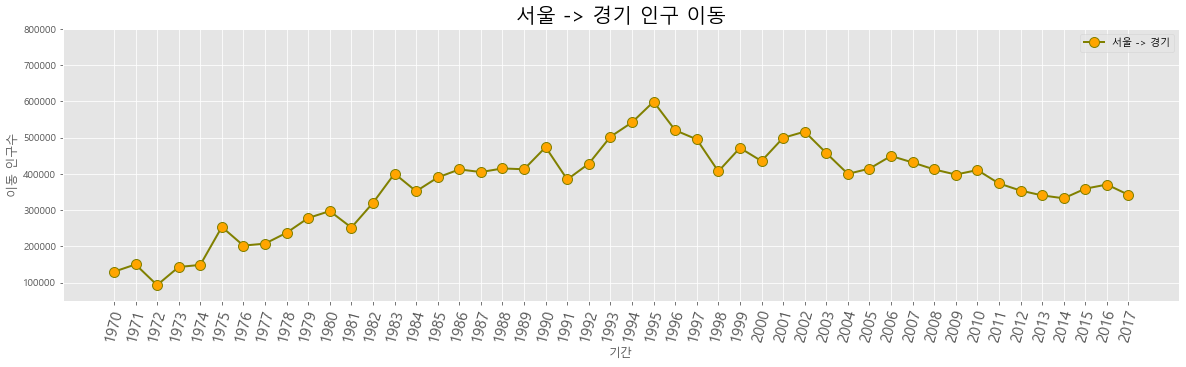

In [20]:
fig = plt.figure(figsize = (20,5))
ax = fig.add_subplot(1,1,1)

ax.plot(sr_one, marker = 'o', markerfacecolor = 'orange',
       markersize = 10, color = 'olive', linewidth = 2,
       label = '서울 -> 경기')
ax.legend(loc = 'best')

ax.set_ylim(50000, 800000)
ax.set_title('서울 -> 경기 인구 이동', size = 20)
ax.set_xlabel('기간', size = 12)
ax.set_ylabel('이동 인구수', size = 12)
ax.set_xticklabels(sr_one.index, rotation = 75)
ax.tick_params(axis = 'x', labelsize = 15)
ax.tick_params(axis = 'y', labelsize = 10)

plt.show()

### 동일한 그림틀(axe 객체) 에 여러 개의 그래프 표시

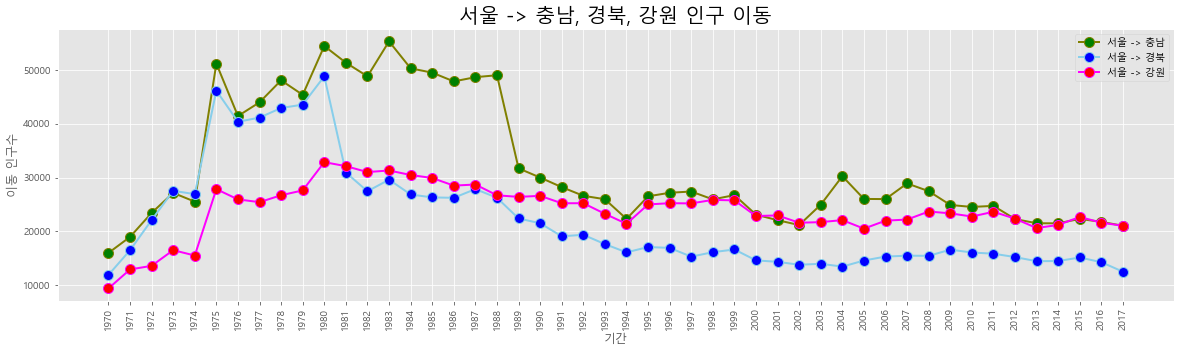

In [23]:
col_years = list(map(str, range(1970, 2018)))
df_3 = df_seoul.loc[['충청남도','경상북도','강원도'], col_years]

fig = plt.figure(figsize = (20, 5))
ax = fig.add_subplot(1,1,1)

ax.plot(col_years, df_3.loc['충청남도'], marker = 'o',
       markerfacecolor = 'green', markersize = 10,
       color = 'olive', linewidth = 2, label = '서울 -> 충남')
ax.plot(col_years, df_3.loc['경상북도'], marker = 'o',
       markerfacecolor = 'blue', markersize = 10,
       color = 'skyblue', linewidth = 2, label = '서울 -> 경북')
ax.plot(col_years, df_3.loc['강원도'], marker = 'o',
       markerfacecolor = 'red', markersize = 10,
       color = 'magenta', linewidth = 2, label = '서울 -> 강원')
ax.legend(loc = 'best')

ax.set_title('서울 -> 충남, 경북, 강원 인구 이동', size = 20)
ax.set_xlabel('기간', size = 12)
ax.set_ylabel('이동 인구수', size = 12)
ax.set_xticklabels(col_years, rotation = 90)
ax.tick_params(axis = 'x', labelsize = 10)
ax.tick_params(axis = 'y', labelsize = 10)

plt.show()

## 영역을 나누어 각각의 영역에 선 그래프 표시

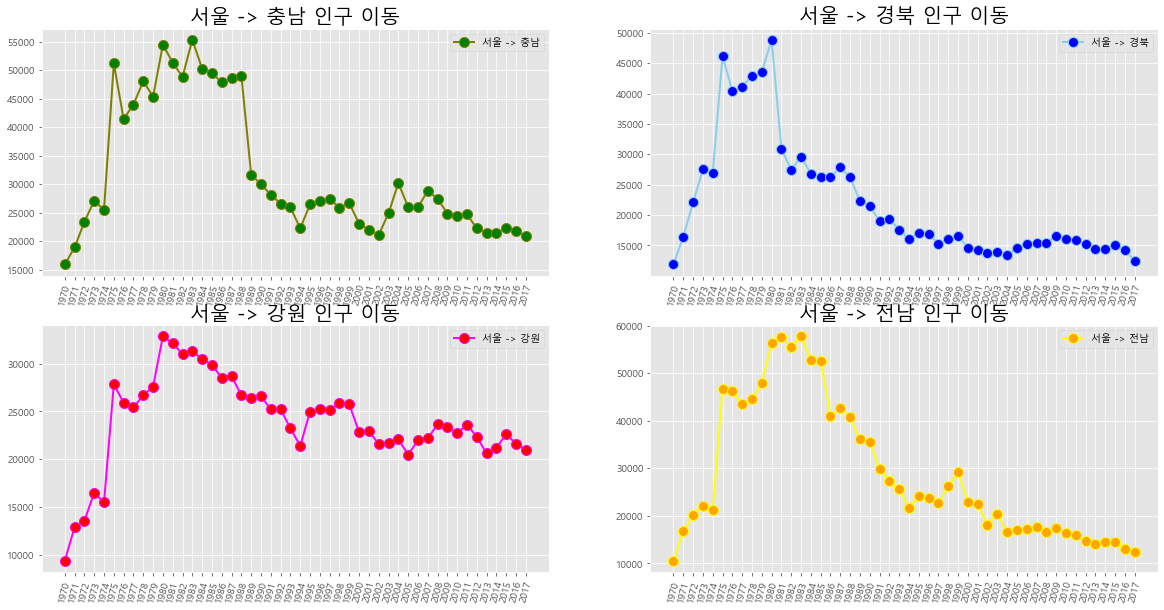

In [24]:
col_years = list(map(str, range(1970, 2018)))
df_3 = df_seoul.loc[['충청남도','경상북도','강원도', '전라남도'], col_years]

fig = plt.figure(figsize = (20, 10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.plot(col_years, df_3.loc['충청남도'], marker = 'o',
       markerfacecolor = 'green', markersize = 10,
       color = 'olive', linewidth = 2, label = '서울 -> 충남')
ax2.plot(col_years, df_3.loc['경상북도'], marker = 'o',
       markerfacecolor = 'blue', markersize = 10,
       color = 'skyblue', linewidth = 2, label = '서울 -> 경북')
ax3.plot(col_years, df_3.loc['강원도'], marker = 'o',
       markerfacecolor = 'red', markersize = 10,
       color = 'magenta', linewidth = 2, label = '서울 -> 강원')
ax4.plot(col_years, df_3.loc['전라남도'], marker = 'o',
       markerfacecolor = 'orange', markersize = 10,
       color = 'yellow', linewidth = 2, label = '서울 -> 전남')

ax1.legend(loc = 'best')
ax2.legend(loc = 'best')
ax3.legend(loc = 'best')
ax4.legend(loc = 'best')


ax1.set_title('서울 -> 충남 인구 이동', size = 20)
ax2.set_title('서울 -> 경북 인구 이동', size = 20)
ax3.set_title('서울 -> 강원 인구 이동', size = 20)
ax4.set_title('서울 -> 전남 인구 이동', size = 20)

ax1.set_xticklabels(col_years, rotation = 75)
ax2.set_xticklabels(col_years, rotation = 75)
ax3.set_xticklabels(col_years, rotation = 75)
ax4.set_xticklabels(col_years, rotation = 75)

plt.show()

## Matplotlib에서 사용할 수 있는 색의 종류

In [28]:
import matplotlib

colors = {}

for name, hex in matplotlib.colors.cnames.items():
    colors[name] = hex
    
print(colors)

# RGB(Red Green Blue) : #F0F8FF
# ARGB(Alpha Red Green Blue) : #00F0F8FF

{'aliceblue': '#F0F8FF', 'antiquewhite': '#FAEBD7', 'aqua': '#00FFFF', 'aquamarine': '#7FFFD4', 'azure': '#F0FFFF', 'beige': '#F5F5DC', 'bisque': '#FFE4C4', 'black': '#000000', 'blanchedalmond': '#FFEBCD', 'blue': '#0000FF', 'blueviolet': '#8A2BE2', 'brown': '#A52A2A', 'burlywood': '#DEB887', 'cadetblue': '#5F9EA0', 'chartreuse': '#7FFF00', 'chocolate': '#D2691E', 'coral': '#FF7F50', 'cornflowerblue': '#6495ED', 'cornsilk': '#FFF8DC', 'crimson': '#DC143C', 'cyan': '#00FFFF', 'darkblue': '#00008B', 'darkcyan': '#008B8B', 'darkgoldenrod': '#B8860B', 'darkgray': '#A9A9A9', 'darkgreen': '#006400', 'darkgrey': '#A9A9A9', 'darkkhaki': '#BDB76B', 'darkmagenta': '#8B008B', 'darkolivegreen': '#556B2F', 'darkorange': '#FF8C00', 'darkorchid': '#9932CC', 'darkred': '#8B0000', 'darksalmon': '#E9967A', 'darkseagreen': '#8FBC8F', 'darkslateblue': '#483D8B', 'darkslategray': '#2F4F4F', 'darkslategrey': '#2F4F4F', 'darkturquoise': '#00CED1', 'darkviolet': '#9400D3', 'deeppink': '#FF1493', 'deepskyblue'

## 막대 그래프

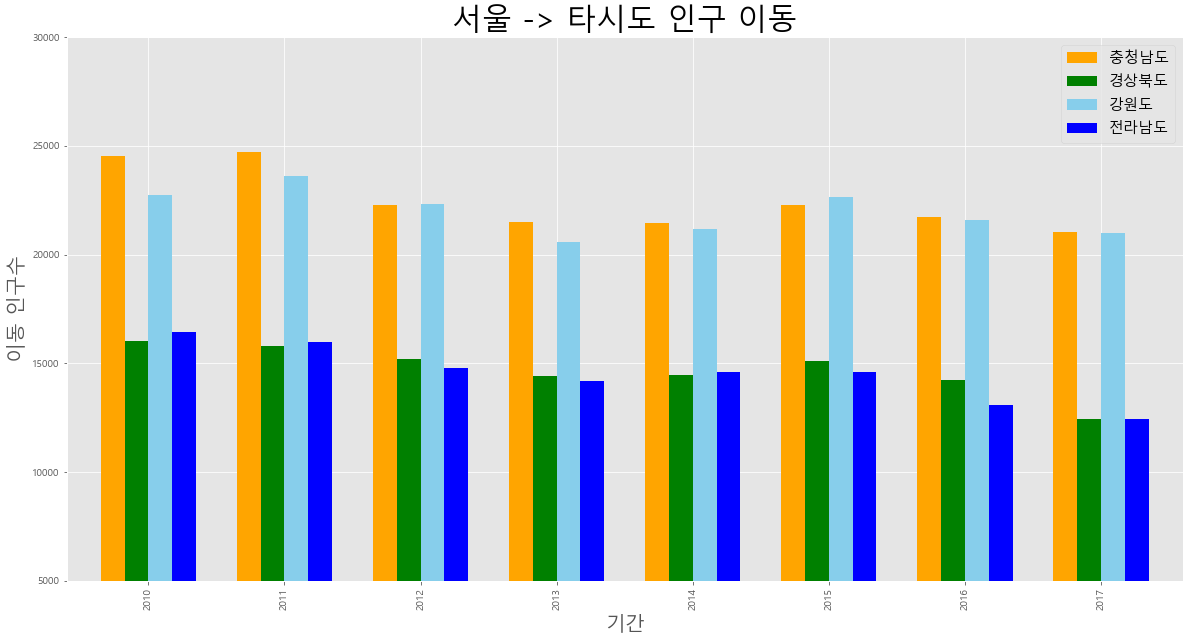

In [32]:
col_years = list(map(str, range(2010, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도','강원도', '전라남도'], col_years]

df_4 = df_4.T
df_4.index = df_4.index.map(int)

df_4.plot(kind = 'bar', figsize = (20, 10), width = 0.7,
         color = ['orange', 'green', 'skyblue','blue'])

plt.title('서울 -> 타시도 인구 이동', size = 30)
plt.ylabel('이동 인구수', size = 20 )
plt.xlabel('기간', size = 20)
plt.ylim(5000, 30000)
plt.legend(loc = 'best', fontsize = 15)

plt.show()

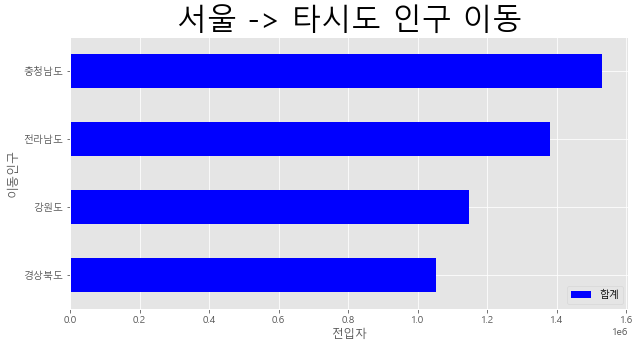

In [35]:
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도', '경상북도', '강원도','전라남도'],
                   col_years]
df_4['합계'] = df_4.sum(axis = 1)
df_total = df_4[['합계']].sort_values(by = '합계', ascending = True)

df_total.plot(kind = 'barh', color = 'blue',
             width = 0.5, figsize = (10,5))

plt.title('서울 -> 타시도 인구 이동', size = 30)
plt.xlabel('전입자')
plt.ylabel('이동인구')

plt.show()

## 파이 차트(pie chart)

           mpg  cylinders  displacement    weight  accelaration  model year  \
origin                                                                        
1       5000.8       1556       61229.5  837121.0        3743.4       18827   
2       1952.4        291        7640.0  169631.0        1175.1        5307   
3       2405.6        324        8114.0  175477.0        1277.6        6118   

        count  
origin         
1         249  
2          70  
3          79  


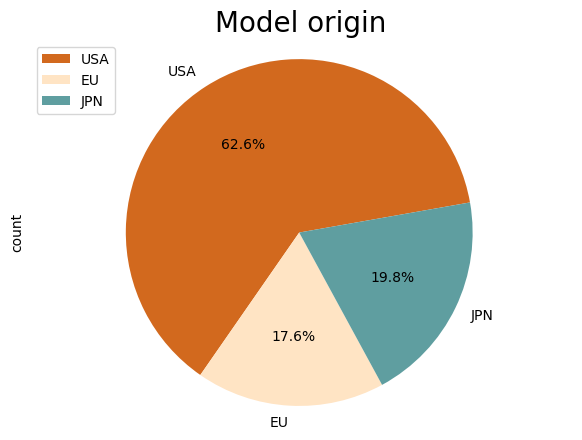

In [38]:
plt.style.use('default')

df = pd.read_csv('data/auto-mpg-title.csv')
df['count'] = 1
df_origin = df.groupby('origin').sum()
print(df_origin.head())
df_origin.index = ['USA', 'EU', 'JPN']

# autopct = '%1.1f%%' : 파이차트 비율 표시
# startangle = 10 : 파이 조각을 나누는 시작점( 각도 )
# colors : 색상 리스트
df_origin['count'].plot(kind = 'pie', figsize = (7,5),
                        autopct = '%1.1f%%',
                        startangle = 10,
                        colors = ['chocolate','bisque', 'cadetblue'])
plt.title('Model origin', size = 20)
plt.axis('equal') # 파이 차이의 비율을 원에 가깝게 조정
plt.legend(labels = df_origin.index, loc = 'upper left')

plt.show()
                        

## 히스토그램

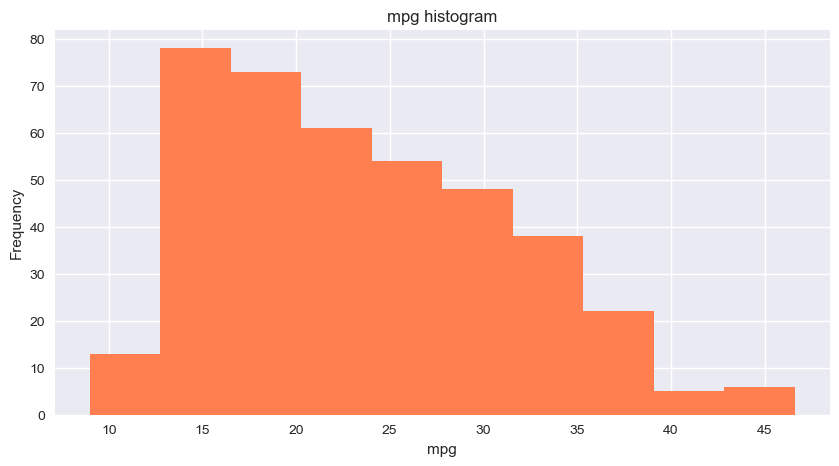

In [40]:
#plt.style.use('ggplot')
plt.style.use('seaborn')

df['mpg'].plot(kind = 'hist', bins = 10, color = 'coral',
              figsize = (10, 5))

plt.title('mpg histogram')
plt.xlabel('mpg')

plt.show()

## 산점도(scatter chart)

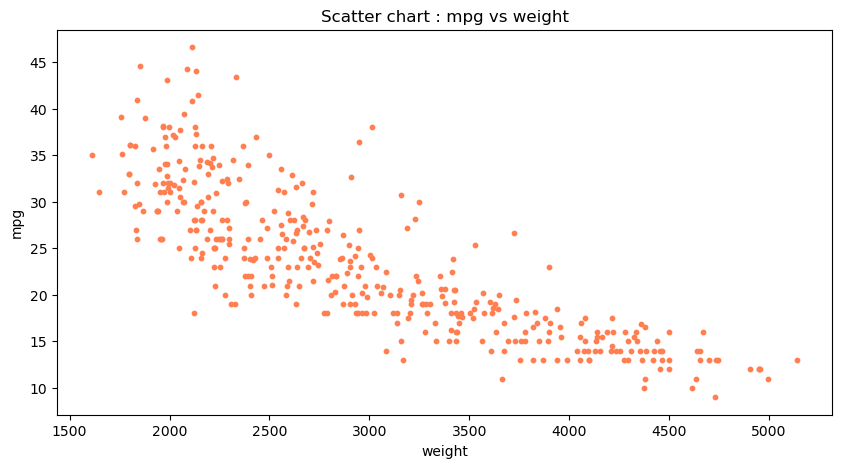

In [41]:
plt.style.use('default')
# s = 10 , 점의 크기
df.plot(kind = 'scatter', x = 'weight', y = 'mpg',
       c = 'coral', s = 10, figsize = (10,5) )

plt.title('Scatter chart : mpg vs weight')

plt.show()

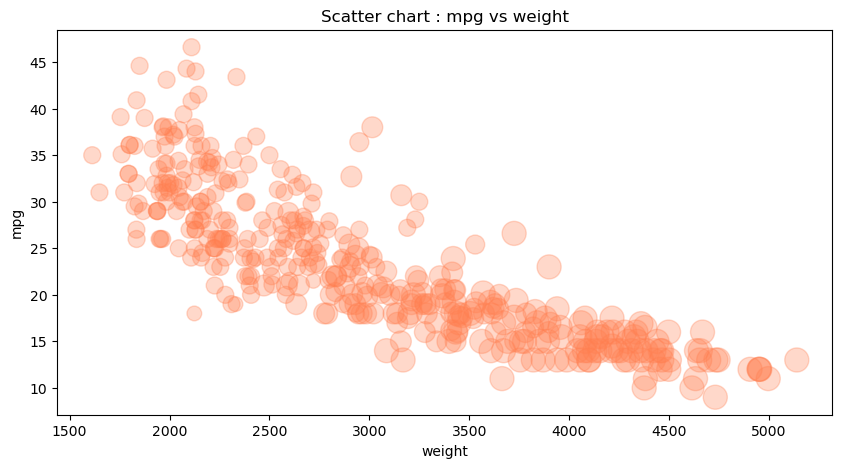

In [45]:
cylinders_size = df.cylinders / df.cylinders.max() * 300

#plt.style.use('default')

df.plot(kind = 'scatter', x = 'weight', y = 'mpg',
       c = 'coral', s = cylinders_size, alpha = 0.3 , figsize = (10,5) )

plt.title('Scatter chart : mpg vs weight')

plt.show()

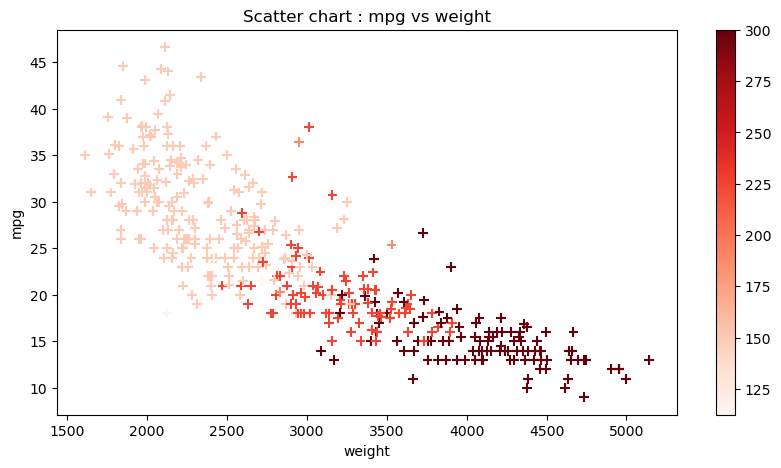

In [47]:
df.plot(kind = 'scatter', x = 'weight', y = 'mpg',
        marker = '+', cmap = 'Reds', # matplotlib.org tutorial colormap 
       c = cylinders_size, s = 50 , figsize = (10,5) )

plt.title('Scatter chart : mpg vs weight')

plt.show()

## (긴) 상자 수염 그래프(box plot)

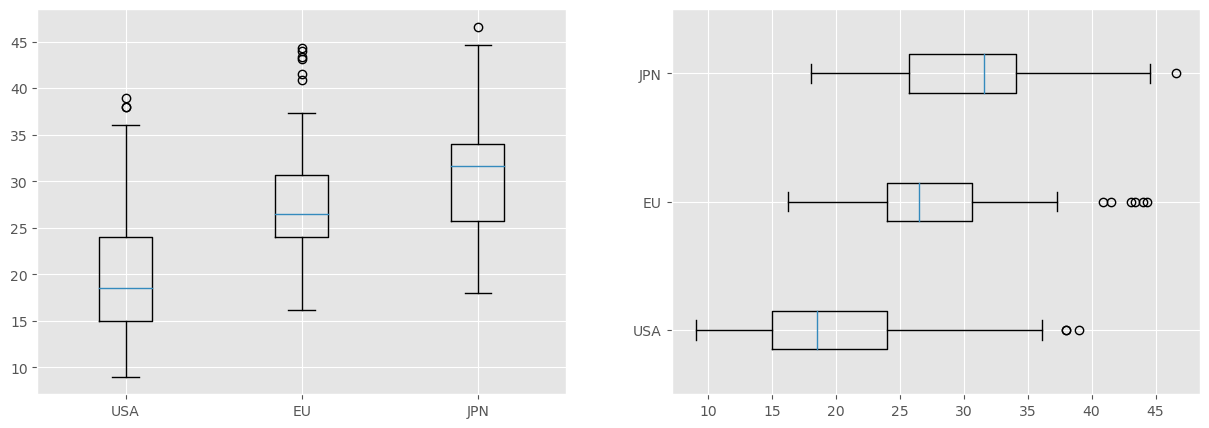

In [51]:
plt.style.use('ggplot')

fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.boxplot(x = [df[df['origin'] == 1]['mpg'],
                df[df['origin'] == 2]['mpg'],
                df[df['origin'] == 3]['mpg']],
           labels = ['USA','EU','JPN'])

ax2.boxplot(x = [df[df['origin'] == 1]['mpg'],
                df[df['origin'] == 2]['mpg'],
                df[df['origin'] == 3]['mpg']],
           labels = ['USA','EU','JPN'],
           vert= False) # 가로로 표현

plt.show()

# Seaborn  시각화

In [52]:
import seaborn as sns

In [53]:
titanic = sns.load_dataset('titanic')

print(titanic.head())
print()
print(titanic.info())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-n

## 회귀선이 있는 산점도

<AxesSubplot:xlabel='age', ylabel='fare'>

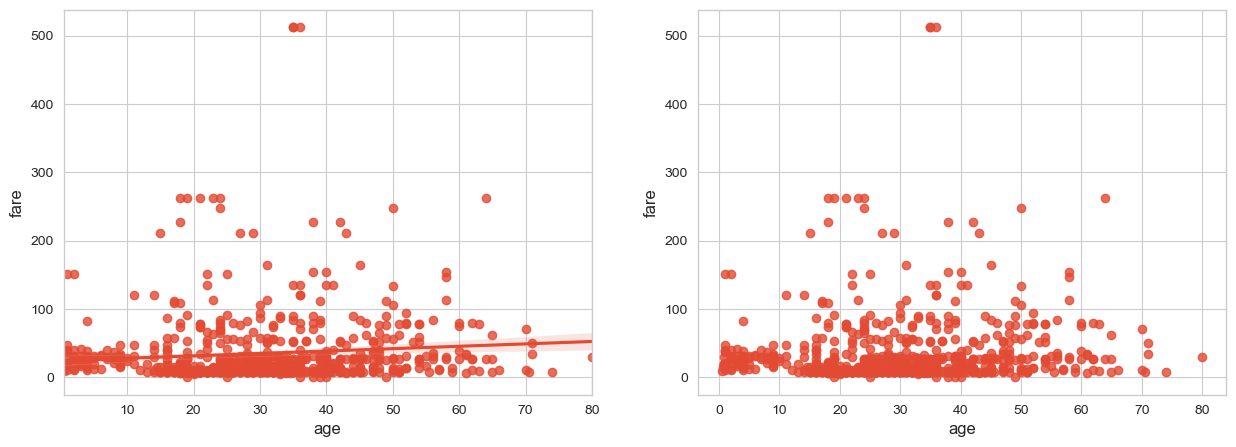

In [54]:
# seaborn 스타일 설정( darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.regplot(x = 'age', y= 'fare', data = titanic, ax = ax1)
sns.regplot(x = 'age', y= 'fare', data = titanic, ax = ax2,
           fit_reg = False)

##  히스토그램 / 커널 밀도 그래프

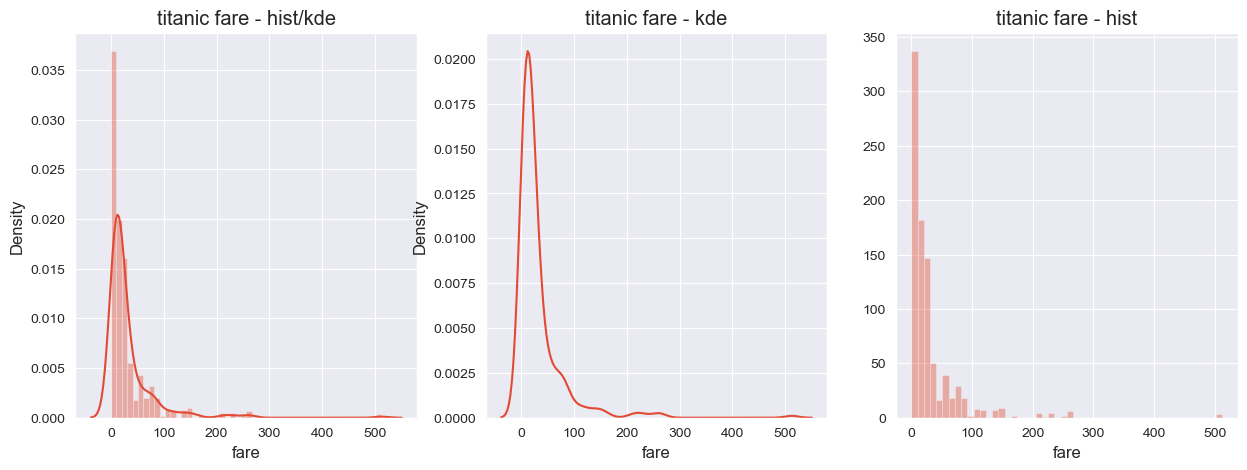

In [55]:
sns.set_style('darkgrid')

fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.distplot(titanic['fare'], ax = ax1)
sns.distplot(titanic['fare'], ax = ax2, hist = False)
sns.distplot(titanic['fare'], ax = ax3, kde = False)

ax1.set_title('titanic fare - hist/kde')
ax2.set_title('titanic fare - kde')
ax3.set_title('titanic fare - hist')

plt.show()


## 히트맵(heatmap)

<AxesSubplot:xlabel='class', ylabel='sex'>

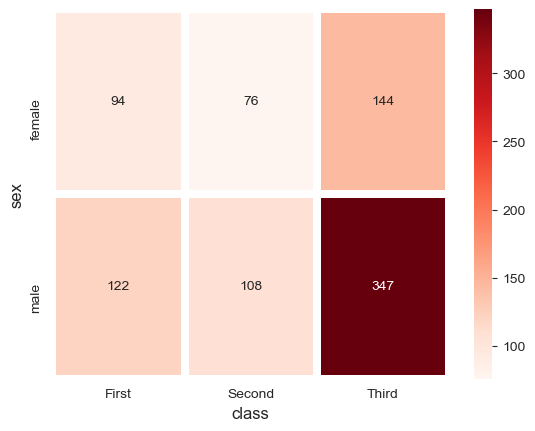

In [56]:
sns.set_style('darkgrid')

table = titanic.pivot_table(index = ['sex'],
                           columns = ['class'],
                           aggfunc = 'size')

# table : 데이터프레임( pivot_table() 함수 결과셋)
# annot = True : 데이터 값 표시 여부
# fmt = 'd' : 데이터 값 표시 형식
# cmap  = 'Reds' : 컬러맵
# linewidth = 5 : 구분선
# cbar = True : 컬러맵 표시 유무

sns.heatmap(table, annot = True, fmt = 'd', cmap = 'Reds',
           linewidth = 5, cbar = True)

## 범주형 데이터에 대한 산점도

<AxesSubplot:xlabel='class', ylabel='age'>

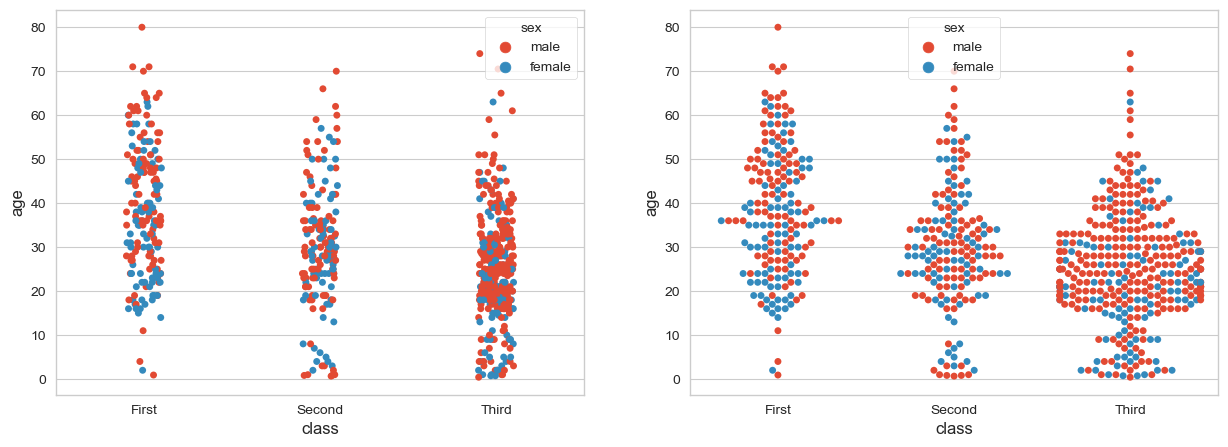

In [58]:
sns.set_style('whitegrid')

fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.stripplot(x = 'class', y = 'age', data = titanic,
             hue = 'sex', ax = ax1)
sns.swarmplot(x = 'class', y = 'age', data = titanic,
             hue = 'sex', ax = ax2)

## 막대 그래프

<AxesSubplot:xlabel='sex', ylabel='survived'>

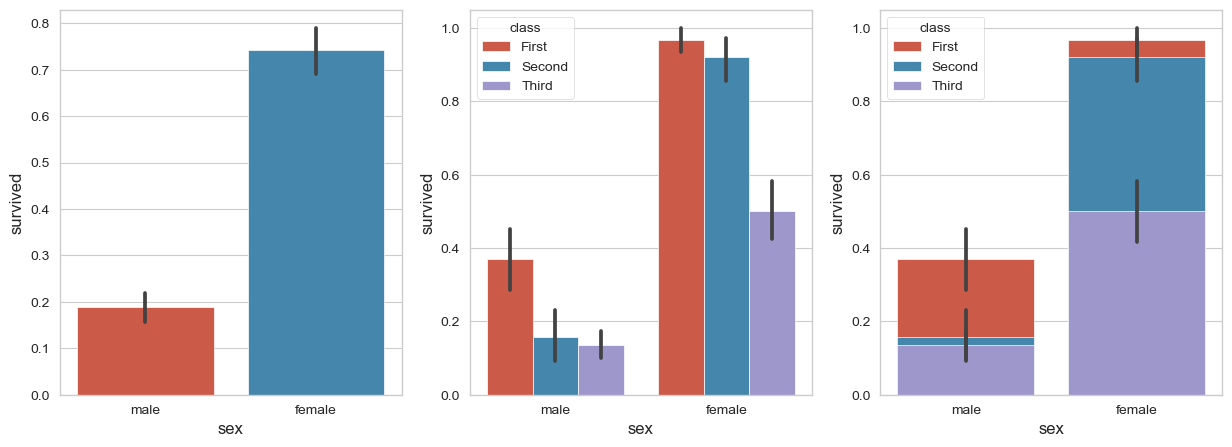

In [61]:
sns.set_style('whitegrid')

fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# 기본 막대 그래프
sns.barplot(x = 'sex', y = 'survived', data = titanic, ax = ax1)
# hue 옵션에 추가된 변수 내용에 따른 막대 분리
sns.barplot(x = 'sex', y = 'survived', data = titanic, hue = 'class', ax = ax2)
# dodge 옵션을 False로 하여 누적 형태의 막대 표시
sns.barplot(x = 'sex', y = 'survived', data = titanic, hue = 'class', dodge = False, ax = ax3)

## 빈도 그래프

<AxesSubplot:xlabel='class', ylabel='count'>

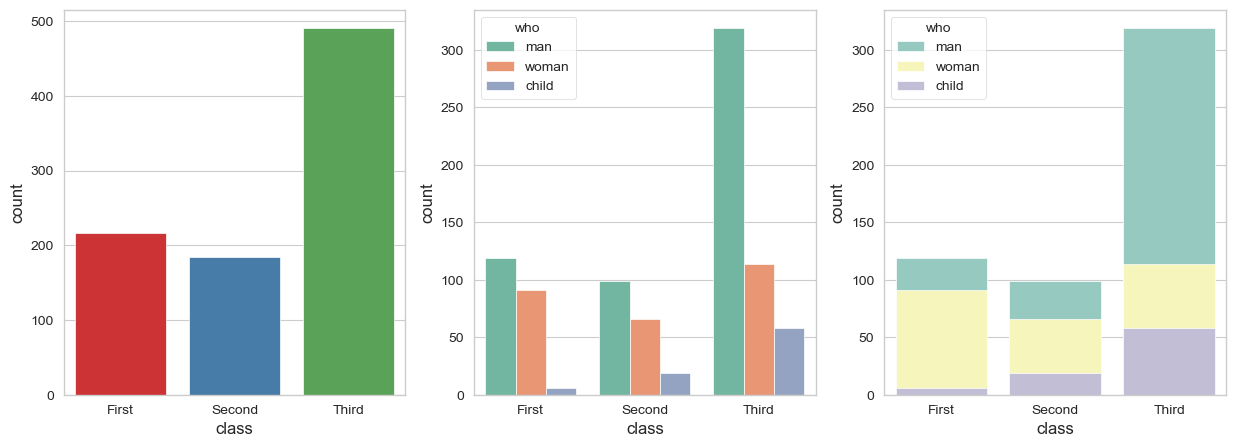

In [63]:
sns.set_style('whitegrid')

fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.countplot(x = 'class', palette = 'Set1', data = titanic, ax = ax1)
sns.countplot(x = 'class', palette = 'Set2', data = titanic, hue = 'who', ax = ax2)
sns.countplot(x = 'class', palette = 'Set3', data = titanic, hue = 'who', dodge = False, ax = ax3)

## 산점도

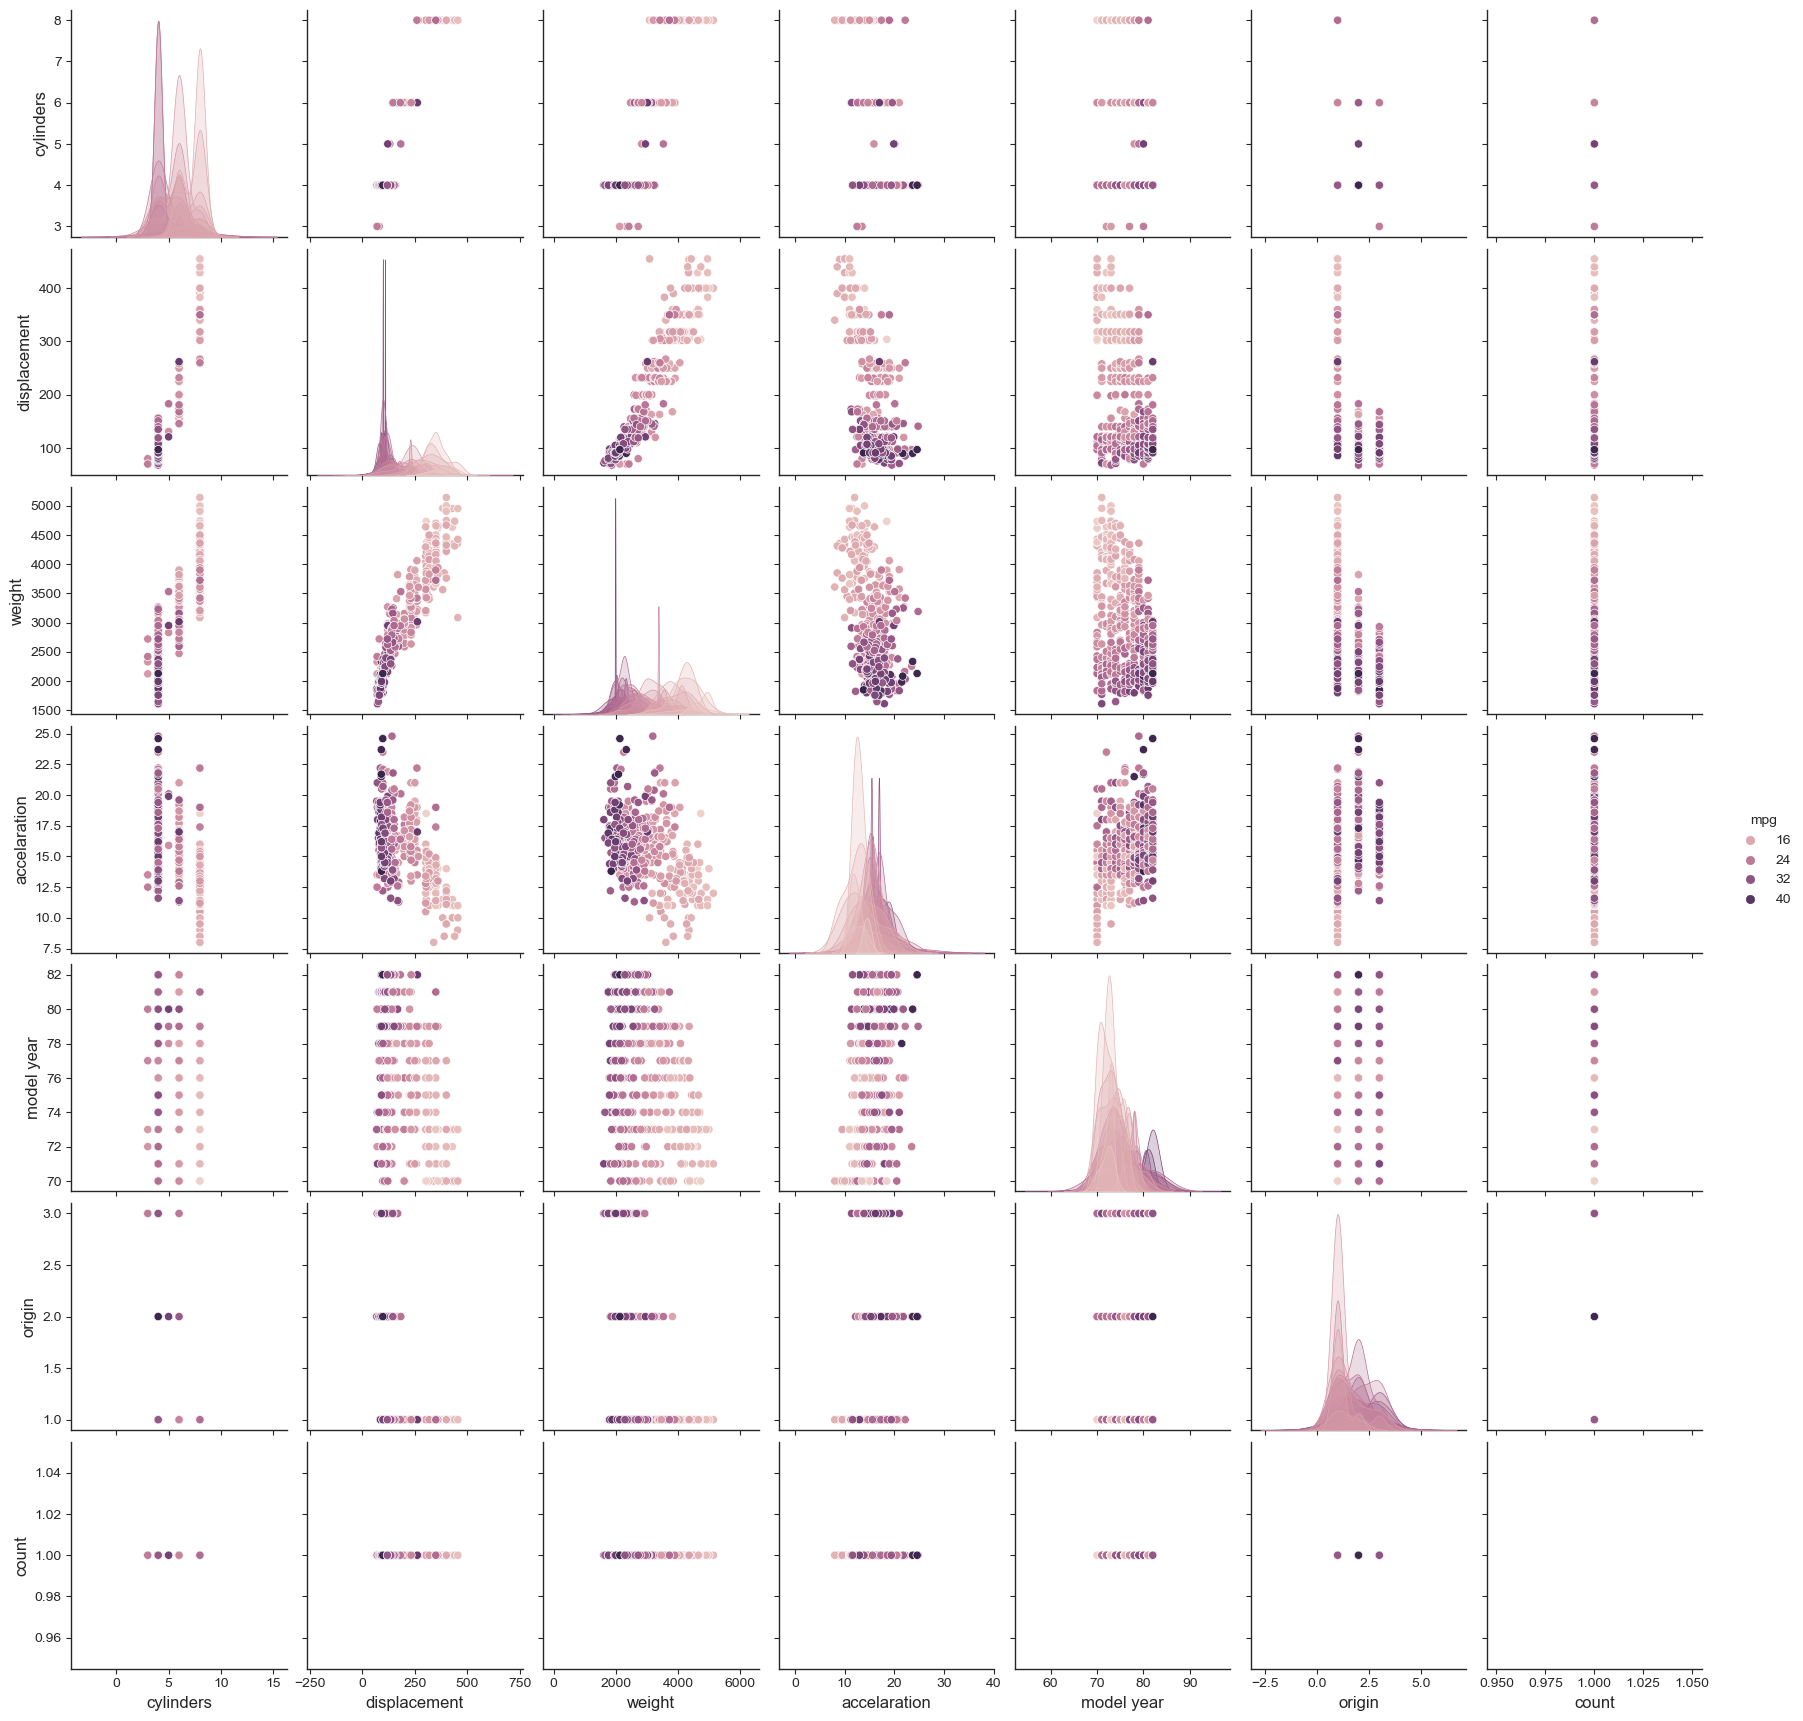

In [64]:
sns.set_style('ticks')

sns.pairplot(df, hue = 'mpg')

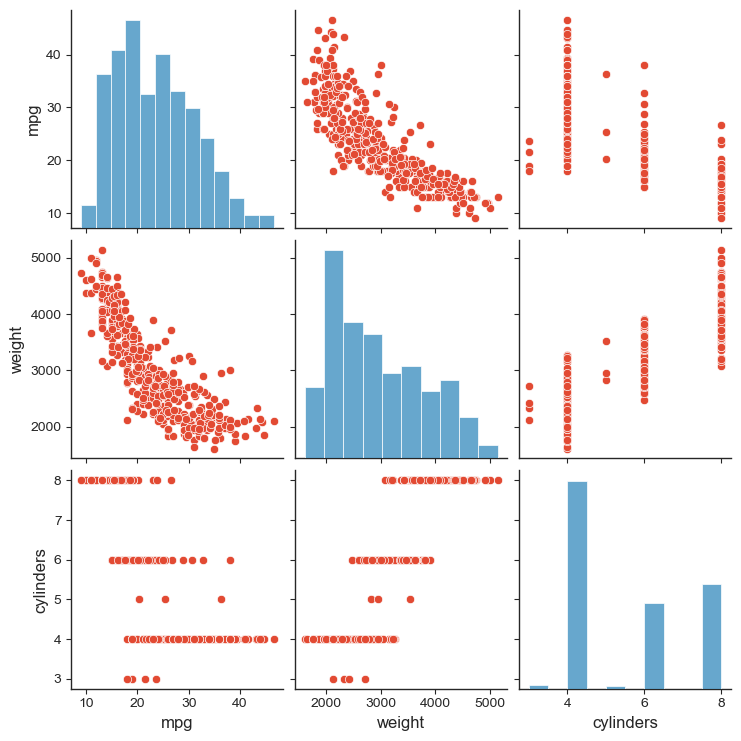

In [65]:
sns.set_style('ticks')

sns.pairplot(df[['mpg','weight','cylinders']])